# Project: Investigating a Dataset of fertility, income and life expectancy all over the world

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose the Gapminder World datasets of women fertility, income and life expectancy all over the world to find the answers of the two questions below:

1-What is the effect of region on income, life expectancy and fertility?
2-What is the effect of time on income, life expectancy and fertility?

###### Note: I chose 5 countries (Egypt, United Kingdom, United States, Australia and China) to represent different regions of the world and it makes sense because they are big countries in their continents

In [51]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing all the packages that are neaded for investigating this data set


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [52]:
# Loading the data from the csv files and trying to understand it. 
fertility = pd.read_csv('children_per_woman_total_fertility.csv')
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
life_expectancy = pd.read_csv('life_expectancy_years.csv')

fertility.info() 
#to understand the types of data in fertility file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 434.2+ KB


In [53]:
income.info() 
#to understand the types of data in income file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB


In [54]:
life_expectancy.info()
#to understand the types of data in life expectancy file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 441.3+ KB


In [55]:
income.head()
#Trying to understand the dataset by showing the first five rows

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [56]:
fertility.head()
#Trying to understand the dataset by showing the first five rows

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


In [57]:
life_expectancy.head()
#Trying to understand the dataset by showing the first five rows

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


### Data Cleaning (Trying to organize my datasets in a way that is easier to perform the analysis)

In [58]:
fertility.set_index('country', inplace = True)
fertility.index.name = '' #renaming to the dataset easier to be understood
fertility_tr = fertility.transpose() #transpose function to covert the horizontal range into vertical range
fertility_tr
#In this step I am trying to convert the years into a column to make it easier to figure out my second question on whether fertility is affected by time or not 

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,7.00,4.60,6.99,6.93,5.00,6.80,7.80,6.50,5.10,8.10,...,4.97,7.03,5.97,5.71,6.60,5.63,4.70,6.88,6.71,6.75
1801,7.00,4.60,6.99,6.93,5.00,6.80,7.80,6.48,5.10,8.10,...,4.60,7.01,5.97,5.71,6.60,5.63,4.70,6.88,6.71,6.75
1802,7.00,4.60,6.99,6.93,4.99,6.80,7.81,6.46,5.10,8.10,...,5.30,6.99,5.96,5.71,6.60,5.64,4.70,6.88,6.71,6.75
1803,7.00,4.60,6.99,6.93,4.99,6.80,7.81,6.44,5.10,8.10,...,5.61,6.96,5.96,5.71,6.60,5.64,4.70,6.88,6.71,6.75
1804,7.00,4.60,6.99,6.93,4.99,6.80,7.81,6.42,5.10,8.10,...,5.65,6.94,5.96,5.71,6.60,5.64,4.70,6.88,6.71,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1.74,1.79,1.86,2.45,1.81,1.82,1.78,1.80,1.79,1.82,...,1.86,1.92,1.81,1.79,1.91,1.79,1.89,1.69,2.51,1.84
2097,1.74,1.79,1.86,2.43,1.81,1.82,1.78,1.80,1.79,1.82,...,1.86,1.92,1.81,1.79,1.90,1.79,1.89,1.70,2.50,1.83
2098,1.74,1.79,1.86,2.42,1.82,1.82,1.78,1.80,1.79,1.82,...,1.86,1.92,1.81,1.79,1.90,1.79,1.89,1.70,2.48,1.83
2099,1.74,1.79,1.86,2.40,1.82,1.82,1.78,1.81,1.79,1.82,...,1.86,1.92,1.81,1.79,1.89,1.79,1.89,1.70,2.46,1.83


In [59]:
income.set_index('country', inplace = True)
income.index.name = ''
income_tr = income.transpose() #renaming to the dataset easier to be understood
income_tr
#In this step I am trying to convert the years into a column to make it easier to figure out my second question on whether income is affected by time or not

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,603,667,715,1200,618,757,1640,514,817,1850,...,3280,1980,1810,502,585,1210,778,877,663,869
1801,603,667,716,1200,620,757,1640,514,822,1850,...,3290,2020,1810,502,586,1200,778,879,665,870
1802,603,667,717,1200,623,757,1650,514,826,1860,...,3300,2050,1820,502,586,1200,778,882,667,871
1803,603,667,718,1200,626,757,1650,514,831,1870,...,3190,2020,1830,502,586,1190,778,884,668,872
1804,603,667,719,1210,628,757,1660,514,836,1880,...,3140,2010,1840,503,586,1190,778,887,670,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2820,21500,15800,81500,6750,31800,23100,16900,58600,60400,...,52200,73800,29500,11300,3590,9110,13300,3570,3860,2900
2037,2880,21900,16100,83100,6880,32500,23500,17300,59700,61700,...,53200,75300,30100,11600,3660,9300,13500,3640,3930,2960
2038,2940,22300,16500,84800,7020,33100,24000,17600,61000,62900,...,54300,76800,30700,11800,3730,9490,13800,3720,4010,3020
2039,3000,22800,16800,86500,7170,33800,24500,18000,62200,64200,...,55400,78400,31300,12000,3810,9680,14100,3790,4100,3080


In [60]:
life_expectancy.set_index('country', inplace = True)
life_expectancy.index.name = ''
life_expectancy_tr = life_expectancy.transpose() #renaming to the dataset easier to be understood
life_expectancy_tr
#In this step I am trying to convert years into a column to make it easier to figure out my second question on whether life expectancy is affected by time or not

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1800,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1801,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1802,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1803,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.3,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1804,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,41.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,77.1,87.9,88.8,NaN,79.4,86.6,87.2,85.9,91.6,91.3,...,90.2,88.1,87.1,79.5,74.0,86.9,84.8,77.9,77.6,75.1
2097,77.3,88.0,88.9,NaN,79.5,86.7,87.3,86.0,91.7,91.5,...,90.3,88.2,87.2,79.6,74.2,87.0,84.9,78.0,77.7,75.3
2098,77.4,88.1,89.0,NaN,79.7,86.8,87.4,86.2,91.8,91.6,...,90.4,88.3,87.3,79.8,74.3,87.1,85.0,78.2,77.8,75.4
2099,77.5,88.2,89.1,NaN,79.8,86.9,87.5,86.3,91.9,91.7,...,90.5,88.4,87.4,79.9,74.4,87.2,85.2,78.3,78.0,75.5


In [61]:
fertility_tr = fertility_tr.add_suffix('_woman_fertility') #adding suffix to columns to make it easier to distinguish the datasets after being merged together
fertility_tr

,Afghanistan_woman_fertility,Albania_woman_fertility,Algeria_woman_fertility,Angola_woman_fertility,Antigua and Barbuda_woman_fertility,Argentina_woman_fertility,Armenia_woman_fertility,Australia_woman_fertility,Austria_woman_fertility,Azerbaijan_woman_fertility,...,United Kingdom_woman_fertility,United States_woman_fertility,Uruguay_woman_fertility,Uzbekistan_woman_fertility,Vanuatu_woman_fertility,Venezuela_woman_fertility,Vietnam_woman_fertility,Yemen_woman_fertility,Zambia_woman_fertility,Zimbabwe_woman_fertility
1800,7.00,4.60,6.99,6.93,5.00,6.80,7.80,6.50,5.10,8.10,...,4.97,7.03,5.97,5.71,6.60,5.63,4.70,6.88,6.71,6.75
1801,7.00,4.60,6.99,6.93,5.00,6.80,7.80,6.48,5.10,8.10,...,4.60,7.01,5.97,5.71,6.60,5.63,4.70,6.88,6.71,6.75
1802,7.00,4.60,6.99,6.93,4.99,6.80,7.81,6.46,5.10,8.10,...,5.30,6.99,5.96,5.71,6.60,5.64,4.70,6.88,6.71,6.75
1803,7.00,4.60,6.99,6.93,4.99,6.80,7.81,6.44,5.10,8.10,...,5.61,6.96,5.96,5.71,6.60,5.64,4.70,6.88,6.71,6.75
1804,7.00,4.60,6.99,6.93,4.99,6.80,7.81,6.42,5.10,8.10,...,5.65,6.94,5.96,5.71,6.60,5.64,4.70,6.88,6.71,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1.74,1.79,1.86,2.45,1.81,1.82,1.78,1.80,1.79,1.82,...,1.86,1.92,1.81,1.79,1.91,1.79,1.89,1.69,2.51,1.84
2097,1.74,1.79,1.86,2.43,1.81,1.82,1.78,1.80,1.79,1.82,...,1.86,1.92,1.81,1.79,1.90,1.79,1.89,1.70,2.50,1.83
2098,1.74,1.79,1.86,2.42,1.82,1.82,1.78,1.80,1.79,1.82,...,1.86,1.92,1.81,1.79,1.90,1.79,1.89,1.70,2.48,1.83
2099,1.74,1.79,1.86,2.40,1.82,1.82,1.78,1.81,1.79,1.82,...,1.86,1.92,1.81,1.79,1.89,1.79,1.89,1.70,2.46,1.83


In [62]:
income_tr = income_tr.add_suffix('_income') #adding suffix to columns to make it easier to distinguish the datasets after being merged together
income_tr

,Afghanistan_income,Albania_income,Algeria_income,Andorra_income,Angola_income,Antigua and Barbuda_income,Argentina_income,Armenia_income,Australia_income,Austria_income,...,United Kingdom_income,United States_income,Uruguay_income,Uzbekistan_income,Vanuatu_income,Venezuela_income,Vietnam_income,Yemen_income,Zambia_income,Zimbabwe_income
1800,603,667,715,1200,618,757,1640,514,817,1850,...,3280,1980,1810,502,585,1210,778,877,663,869
1801,603,667,716,1200,620,757,1640,514,822,1850,...,3290,2020,1810,502,586,1200,778,879,665,870
1802,603,667,717,1200,623,757,1650,514,826,1860,...,3300,2050,1820,502,586,1200,778,882,667,871
1803,603,667,718,1200,626,757,1650,514,831,1870,...,3190,2020,1830,502,586,1190,778,884,668,872
1804,603,667,719,1210,628,757,1660,514,836,1880,...,3140,2010,1840,503,586,1190,778,887,670,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2820,21500,15800,81500,6750,31800,23100,16900,58600,60400,...,52200,73800,29500,11300,3590,9110,13300,3570,3860,2900
2037,2880,21900,16100,83100,6880,32500,23500,17300,59700,61700,...,53200,75300,30100,11600,3660,9300,13500,3640,3930,2960
2038,2940,22300,16500,84800,7020,33100,24000,17600,61000,62900,...,54300,76800,30700,11800,3730,9490,13800,3720,4010,3020
2039,3000,22800,16800,86500,7170,33800,24500,18000,62200,64200,...,55400,78400,31300,12000,3810,9680,14100,3790,4100,3080


In [63]:
life_expectancy_tr = life_expectancy_tr.add_suffix('_life_expectancy') #adding suffix to columns to make it easier to distinguish the datasets after being merged together
life_expectancy_tr

,Afghanistan_life_expectancy,Albania_life_expectancy,Algeria_life_expectancy,Andorra_life_expectancy,Angola_life_expectancy,Antigua and Barbuda_life_expectancy,Argentina_life_expectancy,Armenia_life_expectancy,Australia_life_expectancy,Austria_life_expectancy,...,United Kingdom_life_expectancy,United States_life_expectancy,Uruguay_life_expectancy,Uzbekistan_life_expectancy,Vanuatu_life_expectancy,Venezuela_life_expectancy,Vietnam_life_expectancy,Yemen_life_expectancy,Zambia_life_expectancy,Zimbabwe_life_expectancy
1800,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1801,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1802,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1803,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.3,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1804,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,41.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,77.1,87.9,88.8,NaN,79.4,86.6,87.2,85.9,91.6,91.3,...,90.2,88.1,87.1,79.5,74.0,86.9,84.8,77.9,77.6,75.1
2097,77.3,88.0,88.9,NaN,79.5,86.7,87.3,86.0,91.7,91.5,...,90.3,88.2,87.2,79.6,74.2,87.0,84.9,78.0,77.7,75.3
2098,77.4,88.1,89.0,NaN,79.7,86.8,87.4,86.2,91.8,91.6,...,90.4,88.3,87.3,79.8,74.3,87.1,85.0,78.2,77.8,75.4
2099,77.5,88.2,89.1,NaN,79.8,86.9,87.5,86.3,91.9,91.7,...,90.5,88.4,87.4,79.9,74.4,87.2,85.2,78.3,78.0,75.5


In [64]:
Big_Countries_fertility = fertility_tr.loc[:, ["Egypt_woman_fertility","United Kingdom_woman_fertility","Australia_woman_fertility", "United States_woman_fertility", "China_woman_fertility"]]
Big_Countries_fertility
#In this step we are selecting the datasets of the countries that we are interested to find answers about which are Egypt, United Kingdom, Australia, United States and China
#This represents the fertility of the biggest countries in 5 continents

,Egypt_woman_fertility,United Kingdom_woman_fertility,Australia_woman_fertility,United States_woman_fertility,China_woman_fertility
1800,6.06,4.97,6.50,7.03,5.5
1801,6.06,4.60,6.48,7.01,5.5
1802,6.06,5.30,6.46,6.99,5.5
1803,6.06,5.61,6.44,6.96,5.5
1804,6.06,5.65,6.42,6.94,5.5
...,...,...,...,...,...
2096,1.89,1.86,1.80,1.92,1.8
2097,1.88,1.86,1.80,1.92,1.8
2098,1.88,1.86,1.80,1.92,1.8
2099,1.88,1.86,1.81,1.92,1.8


In [65]:
Big_Countries_income = income_tr.loc[:, ["Egypt_income","United Kingdom_income","Australia_income", "United States_income", "China_income"]]
Big_Countries_income
#In this step we are selecting the datasets of the countries that we are interested to find answers about which are Egypt, United Kingdom, Australia, United States and China
#This represents the income of the biggest countries in 5 continents

,Egypt_income,United Kingdom_income,Australia_income,United States_income,China_income
1800,1590,3280,817,1980,736
1801,1600,3290,822,2020,735
1802,1600,3300,826,2050,733
1803,1600,3190,831,2020,732
1804,1600,3140,836,2010,730
...,...,...,...,...,...
2036,17400,52200,58600,73800,32100
2037,17800,53200,59700,75300,32800
2038,18200,54300,61000,76800,33400
2039,18500,55400,62200,78400,34100


In [66]:
Big_Countries_life_expectancy = life_expectancy_tr.loc[:, ["Egypt_life_expectancy","United Kingdom_life_expectancy","Australia_life_expectancy", "United States_life_expectancy", "China_life_expectancy"]]
Big_Countries_life_expectancy
#In this step we are selecting the datasets of the countries that we are interested to find answers about which are Egypt, United Kingdom, Australia, United States and China
#This represents the life expectancy of the biggest countries in 5 continents

,Egypt_life_expectancy,United Kingdom_life_expectancy,Australia_life_expectancy,United States_life_expectancy,China_life_expectancy
1800,33.0,38.6,34.0,39.4,32.0
1801,33.0,37.4,34.0,39.4,32.0
1802,33.0,38.6,34.0,39.4,32.0
1803,33.0,37.3,34.0,39.4,32.0
1804,33.0,41.4,34.0,39.4,32.0
...,...,...,...,...,...
2096,81.8,90.2,91.6,88.1,88.1
2097,82.0,90.3,91.7,88.2,88.2
2098,82.1,90.4,91.8,88.3,88.3
2099,82.2,90.5,91.9,88.4,88.5


In [67]:
Big_Countries = Big_Countries_fertility.merge(Big_Countries_income, left_index=True, right_index=True)
Big_Countries = Big_Countries.merge(Big_Countries_life_expectancy, left_index=True, right_index=True)
Big_Countries
#Merging the datasets of the big countries together to make it easier for cleaning the data

,Egypt_woman_fertility,United Kingdom_woman_fertility,Australia_woman_fertility,United States_woman_fertility,China_woman_fertility,Egypt_income,United Kingdom_income,Australia_income,United States_income,China_income,Egypt_life_expectancy,United Kingdom_life_expectancy,Australia_life_expectancy,United States_life_expectancy,China_life_expectancy
1800,6.06,4.97,6.50,7.03,5.50,1590,3280,817,1980,736,33.0,38.6,34.0,39.4,32.0
1801,6.06,4.60,6.48,7.01,5.50,1600,3290,822,2020,735,33.0,37.4,34.0,39.4,32.0
1802,6.06,5.30,6.46,6.99,5.50,1600,3300,826,2050,733,33.0,38.6,34.0,39.4,32.0
1803,6.06,5.61,6.44,6.96,5.50,1600,3190,831,2020,732,33.0,37.3,34.0,39.4,32.0
1804,6.06,5.65,6.42,6.94,5.50,1600,3140,836,2010,730,33.0,41.4,34.0,39.4,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2.59,1.86,1.77,1.91,1.72,17400,52200,58600,73800,32100,73.5,83.7,84.8,81.2,80.3
2037,2.57,1.86,1.77,1.91,1.72,17800,53200,59700,75300,32800,73.7,83.8,85.0,81.4,80.5
2038,2.55,1.86,1.76,1.91,1.72,18200,54300,61000,76800,33400,73.8,83.9,85.1,81.5,80.6
2039,2.52,1.86,1.76,1.91,1.73,18500,55400,62200,78400,34100,74.0,84.0,85.2,81.6,80.8


In [68]:
Big_Countries.index.name = 'Year'
Big_Countries.reset_index(level=0, inplace=True) #Coverting the year from being an index into a column and adding new index to start our analysis and make it easier to involve the year column in our analysis to answer question 2
Big_Countries

,Year,Egypt_woman_fertility,United Kingdom_woman_fertility,Australia_woman_fertility,United States_woman_fertility,China_woman_fertility,Egypt_income,United Kingdom_income,Australia_income,United States_income,China_income,Egypt_life_expectancy,United Kingdom_life_expectancy,Australia_life_expectancy,United States_life_expectancy,China_life_expectancy
0,1800,6.06,4.97,6.50,7.03,5.50,1590,3280,817,1980,736,33.0,38.6,34.0,39.4,32.0
1,1801,6.06,4.60,6.48,7.01,5.50,1600,3290,822,2020,735,33.0,37.4,34.0,39.4,32.0
2,1802,6.06,5.30,6.46,6.99,5.50,1600,3300,826,2050,733,33.0,38.6,34.0,39.4,32.0
3,1803,6.06,5.61,6.44,6.96,5.50,1600,3190,831,2020,732,33.0,37.3,34.0,39.4,32.0
4,1804,6.06,5.65,6.42,6.94,5.50,1600,3140,836,2010,730,33.0,41.4,34.0,39.4,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2036,2.59,1.86,1.77,1.91,1.72,17400,52200,58600,73800,32100,73.5,83.7,84.8,81.2,80.3
237,2037,2.57,1.86,1.77,1.91,1.72,17800,53200,59700,75300,32800,73.7,83.8,85.0,81.4,80.5
238,2038,2.55,1.86,1.76,1.91,1.72,18200,54300,61000,76800,33400,73.8,83.9,85.1,81.5,80.6
239,2039,2.52,1.86,1.76,1.91,1.73,18500,55400,62200,78400,34100,74.0,84.0,85.2,81.6,80.8


In [69]:
Big_Countries.info()
#Investigating our data handling missing values,..... etc.
#As we can see that we have no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            241 non-null    object 
 1   Egypt_woman_fertility           241 non-null    float64
 2   United Kingdom_woman_fertility  241 non-null    float64
 3   Australia_woman_fertility       241 non-null    float64
 4   United States_woman_fertility   241 non-null    float64
 5   China_woman_fertility           241 non-null    float64
 6   Egypt_income                    241 non-null    int64  
 7   United Kingdom_income           241 non-null    int64  
 8   Australia_income                241 non-null    int64  
 9   United States_income            241 non-null    int64  
 10  China_income                    241 non-null    int64  
 11  Egypt_life_expectancy           241 non-null    float64
 12  United Kingdom_life_expectancy  241 

In [70]:
Big_Countries.to_csv('Big_Countries.csv')
#Saving our merged and cleaned data into a new CSV for any future concerns

## Exploratory Data Analysis


### Research Question 1 (What is the effect of region on income, life expectancy and fertility?)

In [71]:
Selected_Countries = np.genfromtxt ('Big_Countries.csv', delimiter=",")
Selected_Countries = np.delete(Selected_Countries, (0), axis=0)
Selected_Countries = np.delete(Selected_Countries, (0,1), axis=1)
Selected_Countries
#In this step we are trying to read our data as a numpy array to perform some statistical analysis

array([[ 6.06,  4.97,  6.5 , ..., 34.  , 39.4 , 32.  ],
       [ 6.06,  4.6 ,  6.48, ..., 34.  , 39.4 , 32.  ],
       [ 6.06,  5.3 ,  6.46, ..., 34.  , 39.4 , 32.  ],
       ...,
       [ 2.55,  1.86,  1.76, ..., 85.1 , 81.5 , 80.6 ],
       [ 2.52,  1.86,  1.76, ..., 85.2 , 81.6 , 80.8 ],
       [ 2.5 ,  1.86,  1.76, ..., 85.3 , 81.8 , 81.  ]])

In [72]:
fertility_array = Selected_Countries[:, [0,1,2,3,4]]
fertility_array
#Separating the fertility data into an array

array([[6.06, 4.97, 6.5 , 7.03, 5.5 ],
       [6.06, 4.6 , 6.48, 7.01, 5.5 ],
       [6.06, 5.3 , 6.46, 6.99, 5.5 ],
       ...,
       [2.55, 1.86, 1.76, 1.91, 1.72],
       [2.52, 1.86, 1.76, 1.91, 1.73],
       [2.5 , 1.86, 1.76, 1.91, 1.73]])

In [73]:
fertility_array.shape
#Figuring out the shape of the array

(241, 5)

In [74]:
fertility_array_mean = np.mean(fertility_array[:, [0,1,2,3,4]], axis = 0)
fertility_array_mean
#Calcuating the mean of each column in the array to compare the mean value of fertility between the big countries
#This shows that Egypt has the highest mean value of fertility through that long period of time followed by China then US, Australia
#United Kingdome has the least mean fertility

array([5.45074689, 3.27979253, 3.67041494, 3.81186722, 4.49195021])

In [75]:
income_array = Selected_Countries[:, [5,6,7,8,9]]
income_array
#Separating the income data into an array

array([[ 1590.,  3280.,   817.,  1980.,   736.],
       [ 1600.,  3290.,   822.,  2020.,   735.],
       [ 1600.,  3300.,   826.,  2050.,   733.],
       ...,
       [18200., 54300., 61000., 76800., 33400.],
       [18500., 55400., 62200., 78400., 34100.],
       [18900., 56500., 63500., 80000., 34800.]])

In [76]:
income_array.shape
#Figuring out the shape of the array

(241, 5)

In [77]:
income_array_mean = np.mean(income_array[:, [0,1,2,3,4]], axis = 0)
income_array_mean
#Calcuating the mean of each column in the array to compare the mean value of income between the big countries
#This shows that United States has the highest mean value of income through that long period of time followed by Australia then UK
#China has the least of the mean income value

array([ 4385.10373444, 14975.47717842, 16328.37344398, 19022.03319502,
        3906.07053942])

In [78]:
life_array = Selected_Countries[:, [10,11,12,13,14]]
life_array
#Separating the life expectancy data into an array

array([[33. , 38.6, 34. , 39.4, 32. ],
       [33. , 37.4, 34. , 39.4, 32. ],
       [33. , 38.6, 34. , 39.4, 32. ],
       ...,
       [73.8, 83.9, 85.1, 81.5, 80.6],
       [74. , 84. , 85.2, 81.6, 80.8],
       [74.1, 84.2, 85.3, 81.8, 81. ]])

In [79]:
life_array.shape
#Figuring out the shape of the array (This means 241 rows and 4 columns)

(241, 5)

In [80]:
life_array_mean = np.mean(life_array[:, [0,1,2,3,4]], axis = 0)
life_array_mean
#Calcuating the mean of each column in the array to compare the mean value of life expectancy between the big countries
#This shows that UK has the highest mean value of life expectancy through that long period of time followed by US then Australia and China
#Egypt has the lowest of the mean life expectancy value

array([43.8       , 58.26390041, 57.08174274, 57.18174274, 45.38879668])

In [81]:
Big_Countries.describe()
#To look at the statistics of our dataset

,Egypt_woman_fertility,United Kingdom_woman_fertility,Australia_woman_fertility,United States_woman_fertility,China_woman_fertility,Egypt_income,United Kingdom_income,Australia_income,United States_income,China_income,Egypt_life_expectancy,United Kingdom_life_expectancy,Australia_life_expectancy,United States_life_expectancy,China_life_expectancy
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000
mean,5.450747,3.279793,3.670415,3.811867,4.491950,4385.103734,14975.477178,16328.373444,19022.033195,3906.070539,43.800000,58.26390,57.081743,57.181743,45.388797
std,1.247200,1.435463,1.600215,1.756170,1.635484,4098.419016,14188.166103,16257.115450,20969.087119,7895.737090,15.592969,16.12885,19.220490,16.238167,18.935540
min,2.500000,1.670000,1.760000,1.740000,1.490000,1590.000000,3040.000000,817.000000,1970.000000,560.000000,24.900000,37.30000,34.000000,31.000000,22.400000
25%,5.600000,1.870000,1.940000,2.030000,2.680000,1910.000000,4930.000000,5170.000000,3350.000000,735.000000,32.900000,41.90000,34.000000,39.400000,32.000000
50%,6.030000,2.750000,3.350000,3.540000,5.500000,2730.000000,7970.000000,9050.000000,8130.000000,785.000000,33.000000,56.60000,60.600000,55.400000,32.000000
75%,6.050000,4.850000,5.190000,5.280000,5.500000,5060.000000,20700.000000,24600.000000,29500.000000,1080.000000,58.000000,73.60000,74.400000,74.100000,65.800000
max,6.740000,6.020000,6.500000,7.030000,7.410000,18900.000000,56500.000000,63500.000000,80000.000000,34800.000000,74.100000,84.20000,85.300000,81.800000,81.000000


### Some facts from the statistics of the dataset


The highest value ever of fertility was equal to 7.41 child/woman and it happened in China between 1950 and 2000.

The lowest ever of fertility was equal to 1.49 child/woman and it happened in China before the beginning of the new millinum.

The highest value ever of income is equal to 80000 and it is expected to happen in US in 2040.

The lowest ever of income was equal to 560 and it happened in China.

The highest value ever of life expectancy is equal to 85.30 and it is expected to happen in Australia in 2040.

The lowest ever of life expectancy was equal to 22.40 and it happened in China between 1900 and 1950.

array([[<AxesSubplot:title={'center':'Egypt_woman_fertility'}>,
        <AxesSubplot:title={'center':'United Kingdom_woman_fertility'}>,
        <AxesSubplot:title={'center':'Australia_woman_fertility'}>,
        <AxesSubplot:title={'center':'United States_woman_fertility'}>],
       [<AxesSubplot:title={'center':'China_woman_fertility'}>,
        <AxesSubplot:title={'center':'Egypt_income'}>,
        <AxesSubplot:title={'center':'United Kingdom_income'}>,
        <AxesSubplot:title={'center':'Australia_income'}>],
       [<AxesSubplot:title={'center':'United States_income'}>,
        <AxesSubplot:title={'center':'China_income'}>,
        <AxesSubplot:title={'center':'Egypt_life_expectancy'}>,
        <AxesSubplot:title={'center':'United Kingdom_life_expectancy'}>],
       [<AxesSubplot:title={'center':'Australia_life_expectancy'}>,
        <AxesSubplot:title={'center':'United States_life_expectancy'}>,
        <AxesSubplot:title={'center':'China_life_expectancy'}>,
        <AxesSubplo

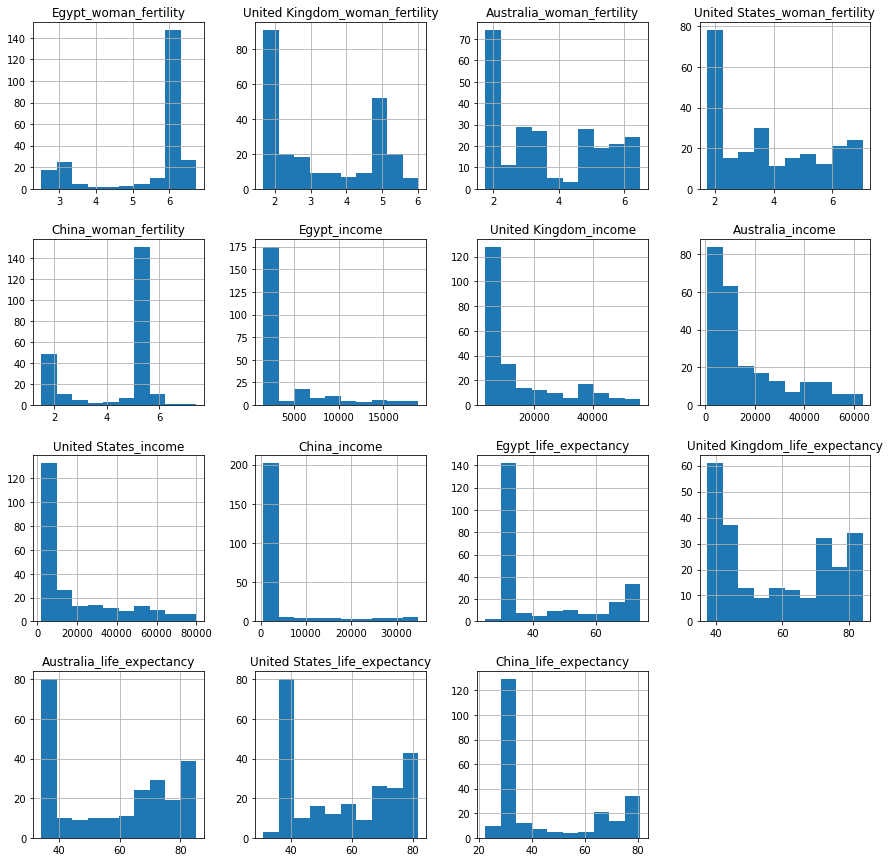

In [82]:
Big_Countries.hist(figsize=(15,15))
#To plot histograms and understand the distribution of the values of the dataset

### Fertility

In Countries like Egypt and China, the fertility are higher and its obvious from the higher number of values are on the right side of the histogram.
While in modern highly developed countries (US, UK and Australia) we can notice that the higher number of values are on the left side and this means less fertile.

### Income

It is very obvious that Egypt and China has the lowest income among the five big countries because the majority of values are on the left side of the histogram.
While the other more developed countries (US, UK and Australia) the income levels are much higher than Egypt and China by far.

### Life Expectancy

When it comes to life expectancy, Egypt and China have their most values on the left side which mean they have lower life expectancy.
While the distribution of values of US, UK and Australia are better towards the right side so the overall life expectancy is higher.

### Research Question 2  (What is the effect of time on income, life expectancy and fertility?)

C:\Users\Mohamed Asem\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Year'>

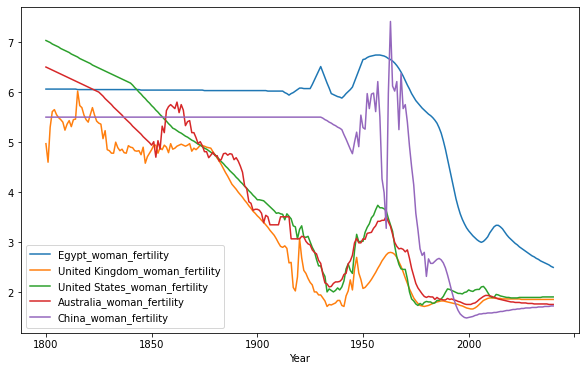

In [83]:
Big_Countries.plot('Year',['Egypt_woman_fertility','United Kingdom_woman_fertility','United States_woman_fertility','Australia_woman_fertility','China_woman_fertility'],kind = 'line', figsize=(10,6))
#Plotting line diagram to compare the effect of time on the women fertility of the 5 countries

### Effect of time on fertility

Egypt and China had high steady fertility values until approximately the first 25 year of 20th century.
US women fertility plummeted steadily at first.
UK and Australia were oscilating in the direction of reducing fertility.
There is an interesting observation that all countries after 1950 experienced an increase in women fertility before it started to decrease again with time and that is very noticeable because it happened in all regions.

C:\Users\Mohamed Asem\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Year'>

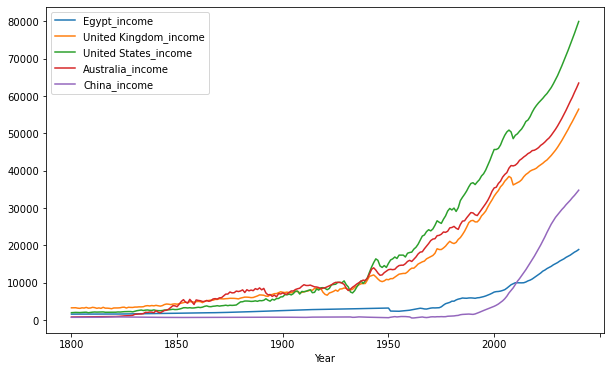

In [84]:
Big_Countries.plot('Year',['Egypt_income','United Kingdom_income','United States_income','Australia_income','China_income'],kind = 'line', figsize=(10,6))
#Plotting line diagram to compare the effect of time on the income of the 5 countries

### Effect of time on income

As a general trend, income has been increasing on the long run in all the top five countries.
When we are looking at the diagram, we observe that the gap between all regions was very narrow and it kept getting wider between developed countries (UK, US, Australia) and developing countries (Egypt and China) starting from 1900.
It is very obvious that the income in Egypt and China stayed roughly constant till 1950 or it was increasing slightly and that's why the gap has been created.
Another interesting observation is that the income in China has been highly increasing since 2000.


C:\Users\Mohamed Asem\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Year'>

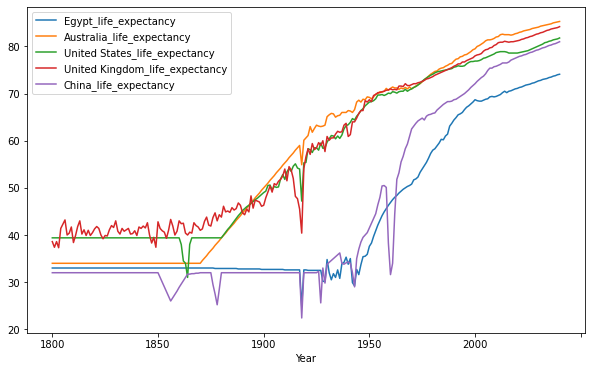

In [85]:
Big_Countries.plot('Year',['Egypt_life_expectancy','Australia_life_expectancy','United States_life_expectancy','United Kingdom_life_expectancy','China_life_expectancy'],kind = 'line', figsize=(10,6))
##Plotting line diagram to compare the effect of time on the life expectancy of the 5 countries

### Effect of time on life expectancy

As it is observed from the curve, life expectancy was nearly constant in Egypt, China, Australia and US between 1800 and 1850 while it was oscillating in UK.

Differences then happened with time as China's life expectancy was decreasing and getting back to normal  untill 1950 then it started started to increase while undergoing some oscillations before starting to increase sharply with time.

Australia's life expectancy was the first to take off and increase steadily with time at first before oscillation in the direction of increasing after that.

The second country where life expectancy started to increase early was US 

We can say that the general trend is the observed increase of life expectancy in the five countries over time.

<a id='conclusions'></a>
## Conclusions


To sum up, the answers of the two questions are now as clear as most possible and I can say that income, life expectancy and fertility are very dependable on the region as I chose a sample of 5 big countries in different regions of the world and I found that fertility depends on whether the region is in the developed or the developing parts of the world as well as income and life expectancy are depending on the region in the same way as we saw from the previous histogram figures.



Also I can say that income, life expectancy and fertility are changing with time and the general trends are showing that fertility decreases with time in an inverse relationship while income and life expectancy are increasing with time as it is very clear from the above line diagrams.

As I mentioned earlier, I chose 5 countries to perform my analysis and at first fertility and life expectancy data have datasets of 302 columns which means that we have values till 2100 but when I merge the datasets together we will have values till 2040 because income table doesn't include data beyond 2040 and that is more accurate than filling in the values with the mean value of income to perform analysis. The samples are enough because it included data about past, present and future so the second question has been answered very well and the missing values have no influence on the results of the analysis.

Finally I can say that the statistical test appreciates the significance of the differences which means that the results are not due to a chance and this is very obvious in this analysis because the general trends has been identically shown in the five countries as it is obvious from the figures included.